# 🎯 4-dars: Ehtimollik va taqsimotlar

- 🎲 **Tanga tashlash** - faqat 2 xil natija
- 📏 **Bo'y o'lchash** - har xil qiymatlar  
- 🎯 **O'yinda g'alaba** - ha yoki yo'q
- ⏰ **Avtobusni kutish** - har xil vaqtlar

Har bir holat uchun **alohida taqsimot** mavjud!

**Ushbu darsda o'rganamiz:**
- 🔔 **Normal taqsimot** - qo'ng'iroq shakli (bo'y, vazn)
- 🎲 **Binomial taqsimot** - ha/yo'q o'yinlari  
- 📏 **Uniform taqsimot** - hammasi teng ehtimol
- ⏰ **Exponential taqsimot** - kutish vaqtlari

---

In [13]:
import numpy as np  # Raqamlar bilan ishlash
import pandas as pd  # Ma'lumotlar bilan ishlash
import matplotlib.pyplot as plt  # Grafiklar chizish
import seaborn as sns  # Chiroyli grafiklar
from scipy import stats  # Statistik hisoblashlar

# Grafik sozlamalari
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12
np.random.seed(42)  # Bir xil natijalar uchun

## 1. 🤔 Ehtimollik nima?

### 🎲 Oddiy misoldan boshlaymiz:

Tasavvur qiling, sizning cho'ntagingizda **10 ta koptok** bor:
- **6 ta qizil** 🔴
- **4 ta ko'k** 🔵

**Savol**: Ko'zingizni yumib bitta koptok olsangiz, qizil koptok olish ehtimoli qancha?

**Javob**: 6/10 = 0.6 = 60%

### 📊 Ehtimollik qoidalari:

**1. Ehtimollik doimo 0 dan 1 gacha:**
- 0 = "Hech qachon bo'lmaydi" ❌
- 0.5 = "50-50 imkoniyat" ⚖️
- 1 = "Har doim bo'ladi" ✅

**2. Barcha ehtimolliklar yig'indisi = 1:**
- Qizil: 0.6 + Ko'k: 0.4 = 1.0 ✅

### 🎮 Kundalik hayotdan misollar:

| Voqea | Ehtimollik | Foiz |
|-------|------------|------|
| Tanga - Bosh | 0.5 | 50% |
| Karta - Qarg'a | 0.25 | 25% |
| Yomg'ir (bulutli kun) | 0.7 | 70% |
| Imtihondan o'tish (o'qigan bo'lsa) | 0.9 | 90% |

### 🧮 Asosiy formulalar:

**Ehtimollik = Qulay holatlar / Jami holatlar**

Masalan:
- Soqqani 6 tushi: 1/6 ≈ 0.167
- Tanga bosh: 1/2 = 0.5
- Karta qiroli: 4/52 ≈ 0.077

🎲 TANGA TASHLASH SIMULATSIYASI
📊 1000 marta tanga tashladik:
   • Bosh: 503 marta (50.3%)
   • Quyruq: 497 marta (49.7%)
   • Nazariy ehtimollik: 50%
   • Haqiqiy ehtimollik: 50.3%


/var/folders/kp/_7qjsy8s0lg8j_3vqs3w_jzm0000gn/T/ipykernel_98157/4207170130.py:51: UserWarning: Glyph 127922 (\N{GAME DIE}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/kp/_7qjsy8s0lg8j_3vqs3w_jzm0000gn/T/ipykernel_98157/4207170130.py:51: UserWarning: Glyph 129689 (\N{COIN}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/kp/_7qjsy8s0lg8j_3vqs3w_jzm0000gn/T/ipykernel_98157/4207170130.py:51: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  plt.tight_layout()


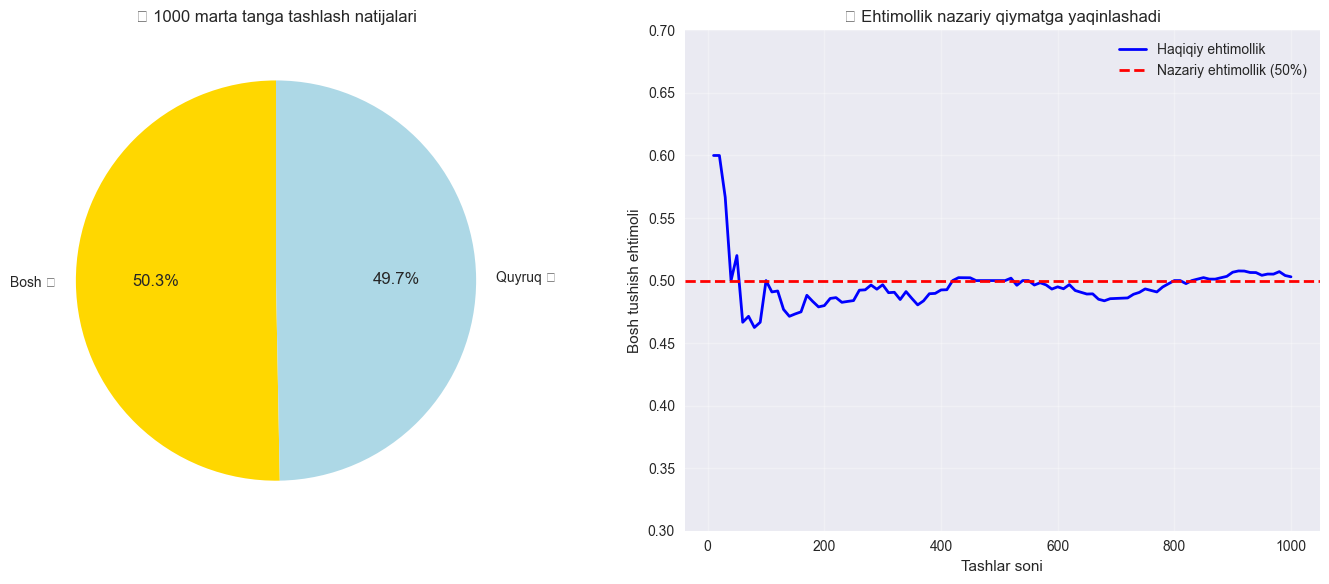


💡 MUHIM XULOSA:
   Ko'p marta takrorlasak, haqiqiy natija nazariy ehtimollikga yaqinlashadi!
   Bu 'Katta sonlar qonuni' deyiladi! 📈


In [18]:
# 🎲 EHTIMOLLIK SIMULATSIYASI
print("🎲 TANGA TASHLASH SIMULATSIYASI")
print("=" * 35)

# 1000 marta tanga tashlash
n_flips = 1000
flips = np.random.choice(['Bosh', 'Quyruq'], n_flips, p=[0.5, 0.5])

# Natijalarni hisoblash
heads_count = np.sum(flips == 'Bosh')
tails_count = np.sum(flips == 'Quyruq')
heads_probability = heads_count / n_flips

print(f"📊 {n_flips} marta tanga tashladik:")
print(f"   • Bosh: {heads_count} marta ({heads_count/n_flips*100:.1f}%)")
print(f"   • Quyruq: {tails_count} marta ({tails_count/n_flips*100:.1f}%)")
print(f"   • Nazariy ehtimollik: 50%")
print(f"   • Haqiqiy ehtimollik: {heads_probability*100:.1f}%")

# Grafik chizish
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# 1. Pie chart
labels = ['Bosh 🪙', 'Quyruq 🪙']
sizes = [heads_count, tails_count]
colors = ['gold', 'lightblue']

ax1.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
ax1.set_title(f'🎲 {n_flips} marta tanga tashlash natijalari')

# 2. Ehtimollik o'zgarishi
# Har 10 ta tashdan keyin ehtimollik qanday o'zgaradi
running_prob = []
x_values = []

for i in range(10, n_flips+1, 10):
    current_heads = np.sum(flips[:i] == 'Bosh')
    current_prob = current_heads / i
    running_prob.append(current_prob)
    x_values.append(i)

ax2.plot(x_values, running_prob, 'b-', linewidth=2, label='Haqiqiy ehtimollik')
ax2.axhline(y=0.5, color='r', linestyle='--', linewidth=2, label='Nazariy ehtimollik (50%)')
ax2.set_xlabel('Tashlar soni')
ax2.set_ylabel('Bosh tushish ehtimoli')
ax2.set_title('📈 Ehtimollik nazariy qiymatga yaqinlashadi')
ax2.legend()
ax2.grid(True, alpha=0.3)
ax2.set_ylim(0.3, 0.7)

plt.tight_layout()
plt.show()

print("\n💡 MUHIM XULOSA:")
print("   Ko'p marta takrorlasak, haqiqiy natija nazariy ehtimollikga yaqinlashadi!")
print("   Bu 'Katta sonlar qonuni' deyiladi! 📈")

## 2. 🔔 Normal taqsimot: "Qo'ng'iroq shakli"

### 🏀 Oddiy misoldan boshlaymiz:

Tasavvur qiling, **100 ta basketbolchi**ning bo'yini o'lchadik:
- **Eng past**: 160 sm
- **Eng baland**: 220 sm  
- **Ko'pchilik**: 180-190 sm atrofida

Agar bu ma'lumotlarni grafikda ko'rsatsak, **qo'ng'iroq shakli** hosil bo'ladi! 🔔

### 🤔 Normal taqsimot nima?

**Normal taqsimot** - bu tabiatda eng ko'p uchraydigan naqsh:
- 👥 **Odamlarning bo'yi**
- 🧠 **IQ darajasi** 
- 📏 **O'quvchilarning baholari**
- 🌡️ **Kunlik harorat**

### 🔔 Nima uchun "qo'ng'iroq" shakli?

1. **O'rtada ko'p**: Ko'pchilik o'rtacha qiymatga yaqin
2. **Chetlarda kam**: Juda past yoki juda yuqori kam uchraydi
3. **Simmetrik**: Chap va o'ng tomoni bir xil

### 📊 Asosiy parametrlar:

**μ (mu) - O'rtacha:** Qo'ng'iroqning markazi
**σ (sigma) - Standart og'ish:** Qo'ng'iroqning kengligi

### 🎯 68-95-99.7 qoidasi (JUDA MUHIM!):

Bu **oltin qoida**! Har bir normal taqsimotda:
- **68%** ma'lumotlar μ ± 1σ oralig'ida
- **95%** ma'lumotlar μ ± 2σ oralig'ida  
- **99.7%** ma'lumotlar μ ± 3σ oralig'ida

**Oddiy qilib**: Deyarli barchasi (99.7%) 3σ ichida!

### 🧮 Matematik formula (qo'rqmang!):

$$f(x) = \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{(x-\mu)^2}{2\sigma^2}}$$

**Bu formula nimani bildiradi?**
- x - har qanday qiymat
- μ - o'rtacha
- σ - standart og'ish
- π ≈ 3.14 (doira soni)
- e ≈ 2.72 (matematik konstanta)

🏀 BASKETBOLCHILAR BO'YI SIMULATSIYASI
📊 100 ta basketbolchi bo'yi:
   • O'rtacha bo'y: 185.7 sm
   • Standart og'ish: 8.8 sm
   • Eng past: 167.2 sm
   • Eng baland: 209.9 sm


/var/folders/kp/_7qjsy8s0lg8j_3vqs3w_jzm0000gn/T/ipykernel_98157/1149760306.py:74: UserWarning: Glyph 128276 (\N{BELL}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/kp/_7qjsy8s0lg8j_3vqs3w_jzm0000gn/T/ipykernel_98157/1149760306.py:74: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/kp/_7qjsy8s0lg8j_3vqs3w_jzm0000gn/T/ipykernel_98157/1149760306.py:74: UserWarning: Glyph 128295 (\N{WRENCH}) missing from font(s) Arial.
  plt.tight_layout()


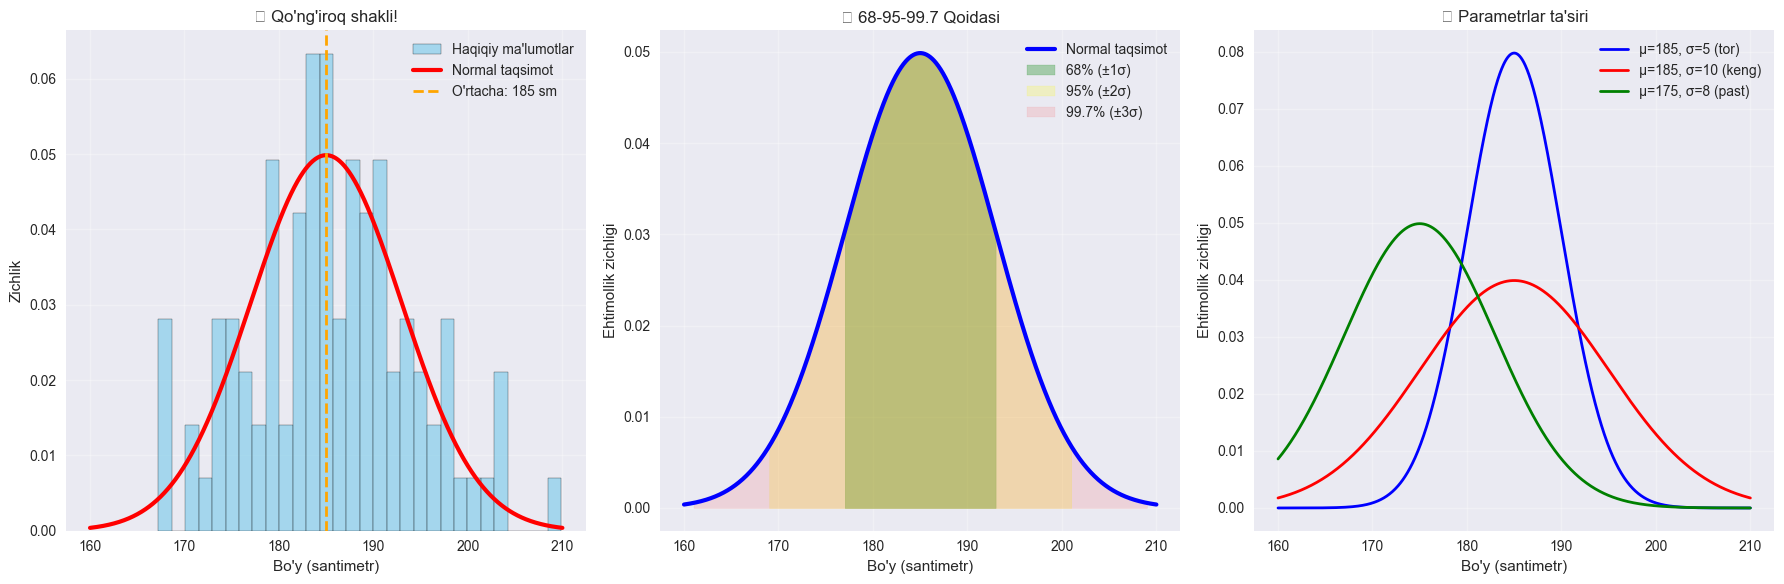


🎯 68-95-99.7 QOIDASI TEKSHIRUVI:
   • ±1σ ichida: 62.0% (kutilgan: 68%)
   • ±2σ ichida: 90.0% (kutilgan: 95%)
   • ±3σ ichida: 99.0% (kutilgan: 99.7%)

💡 AMALIY MA'NO:
   • 177-193 sm bo'yli basketbolchilar: ~68%
   • 169-201 sm bo'yli basketbolchilar: ~95%
   • 161-209 sm bo'yli basketbolchilar: ~99.7%
   • 2 metr+ basketbolchilar: juda kam! (<2.5%)


In [20]:
# 🏀 BASKETBOLCHILAR BO'YI - NORMAL TAQSIMOT MISOLI
print("🏀 BASKETBOLCHILAR BO'YI SIMULATSIYASI")
print("=" * 40)

# Basketbolchilar bo'yini simulatsiya qilish
mu_height = 185  # O'rtacha bo'y (sm)
sigma_height = 8  # Standart og'ish (sm)
n_players = 100  # 1000 ta basketbolchi

# Ma'lumotlar yaratish
heights = np.random.normal(mu_height, sigma_height, n_players)

print(f"📊 {n_players} ta basketbolchi bo'yi:")
print(f"   • O'rtacha bo'y: {np.mean(heights):.1f} sm")
print(f"   • Standart og'ish: {np.std(heights):.1f} sm")
print(f"   • Eng past: {np.min(heights):.1f} sm")
print(f"   • Eng baland: {np.max(heights):.1f} sm")

# 3 ta grafik yaratamiz
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

# 1. HISTOGRAM - haqiqiy ma'lumotlar
ax1.hist(heights, bins=30, density=True, alpha=0.7, color='skyblue', 
         edgecolor='black', label='Haqiqiy ma\'lumotlar')

# Normal taqsimot chizig'i
x = np.linspace(160, 210, 1000)
y = stats.norm.pdf(x, mu_height, sigma_height)
ax1.plot(x, y, 'r-', linewidth=3, label='Normal taqsimot')

ax1.axvline(mu_height, color='orange', linestyle='--', linewidth=2, 
            label=f'O\'rtacha: {mu_height} sm')
ax1.set_xlabel('Bo\'y (santimetr)')
ax1.set_ylabel('Zichlik')
ax1.set_title('🔔 Qo\'ng\'iroq shakli!')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2. 68-95-99.7 QOIDASI
ax2.plot(x, y, 'b-', linewidth=3, label='Normal taqsimot')

# 68% (1 sigma)
x1 = x[(x >= mu_height - sigma_height) & (x <= mu_height + sigma_height)]
y1 = stats.norm.pdf(x1, mu_height, sigma_height)
ax2.fill_between(x1, y1, alpha=0.3, color='green', label='68% (±1σ)')

# 95% (2 sigma)  
x2 = x[(x >= mu_height - 2*sigma_height) & (x <= mu_height + 2*sigma_height)]
y2 = stats.norm.pdf(x2, mu_height, sigma_height)
ax2.fill_between(x2, y2, alpha=0.2, color='yellow', label='95% (±2σ)')

# 99.7% (3 sigma)
x3 = x[(x >= mu_height - 3*sigma_height) & (x <= mu_height + 3*sigma_height)]
y3 = stats.norm.pdf(x3, mu_height, sigma_height)
ax2.fill_between(x3, y3, alpha=0.1, color='red', label='99.7% (±3σ)')

ax2.set_xlabel('Bo\'y (santimetr)')
ax2.set_ylabel('Ehtimollik zichligi')
ax2.set_title('📊 68-95-99.7 Qoidasi')
ax2.legend()
ax2.grid(True, alpha=0.3)

# 3. HAR XIL PARAMETRLAR BILAN TAQQOSLASH
ax3.plot(x, stats.norm.pdf(x, 185, 5), 'b-', linewidth=2, label='μ=185, σ=5 (tor)')
ax3.plot(x, stats.norm.pdf(x, 185, 10), 'r-', linewidth=2, label='μ=185, σ=10 (keng)')
ax3.plot(x, stats.norm.pdf(x, 175, 8), 'g-', linewidth=2, label='μ=175, σ=8 (past)')

ax3.set_xlabel('Bo\'y (santimetr)')
ax3.set_ylabel('Ehtimollik zichligi')
ax3.set_title('🔧 Parametrlar ta\'siri')
ax3.legend()
ax3.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 68-95-99.7 qoidasini tekshirish
within_1sigma = np.sum((heights >= mu_height - sigma_height) & 
                       (heights <= mu_height + sigma_height)) / n_players * 100
within_2sigma = np.sum((heights >= mu_height - 2*sigma_height) & 
                       (heights <= mu_height + 2*sigma_height)) / n_players * 100
within_3sigma = np.sum((heights >= mu_height - 3*sigma_height) & 
                       (heights <= mu_height + 3*sigma_height)) / n_players * 100

print(f"\n🎯 68-95-99.7 QOIDASI TEKSHIRUVI:")
print(f"   • ±1σ ichida: {within_1sigma:.1f}% (kutilgan: 68%)")
print(f"   • ±2σ ichida: {within_2sigma:.1f}% (kutilgan: 95%)")
print(f"   • ±3σ ichida: {within_3sigma:.1f}% (kutilgan: 99.7%)")

print(f"\n💡 AMALIY MA'NO:")
print(f"   • 177-193 sm bo'yli basketbolchilar: ~68%")
print(f"   • 169-201 sm bo'yli basketbolchilar: ~95%") 
print(f"   • 161-209 sm bo'yli basketbolchilar: ~99.7%")
print(f"   • 2 metr+ basketbolchilar: juda kam! (<2.5%)")

## 🎲 Binomial Taqsimot (Ikki holat taqsimoti)

**Oddiy tilda:** Bu "ha yoki yo'q", "muvaffaqiyat yoki muvaffaqiyatsizlik" holatlari uchun! 

**Misol:** 
- 🏀 10 ta erkin urishdan nechtasi kirib qoladi?
- 📝 20 ta savoldan nechtasiga to'g'ri javob berasan?
- 🎯 Nishon otishda 5 ta urinishdan nechtasi tegadi?

### 📚 Asosiy tushunchalar:

- **n** = urinishlar soni (masalan, 10 ta erkin urish)
- **p** = muvaffaqiyat ehtimoli (masalan, to'p kirib qolish ehtimoli = 0.7)
- **X** = muvaffaqiyatlar soni (masalan, necha ta to'p kirib qoldi)

### 🧮 Formula:
```
P(X = k) = C(n,k) × p^k × (1-p)^(n-k)
```

**Oddiy tilda:** k ta muvaffaqiyat ehtimoli = (usullar soni) × (muvaffaqiyat ehtimoli)^k × (muvaffaqiyatsizlik ehtimoli)^(qolgan urinishlar)

🏀 BASKETBALL ERKIN URISH O'YINI!
📊 O'yin shartlari:
   • Har o'yinda 10 ta erkin urish
   • Har urishning kirib qolish ehtimoli: 70.0%
   • Jami o'yinlar: 1000
🎯 NATIJALAR:
   • O'rtacha kirib qolgan to'plar: 7.0
   • Eng ko'p kirib qolgan: 10
   • Eng kam kirib qolgan: 2


/var/folders/kp/_7qjsy8s0lg8j_3vqs3w_jzm0000gn/T/ipykernel_98157/1987112891.py:73: UserWarning: Glyph 127922 (\N{GAME DIE}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/kp/_7qjsy8s0lg8j_3vqs3w_jzm0000gn/T/ipykernel_98157/1987112891.py:73: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/kp/_7qjsy8s0lg8j_3vqs3w_jzm0000gn/T/ipykernel_98157/1987112891.py:73: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  plt.tight_layout()
/Users/bnutfilloyev/Developer/lesson/venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


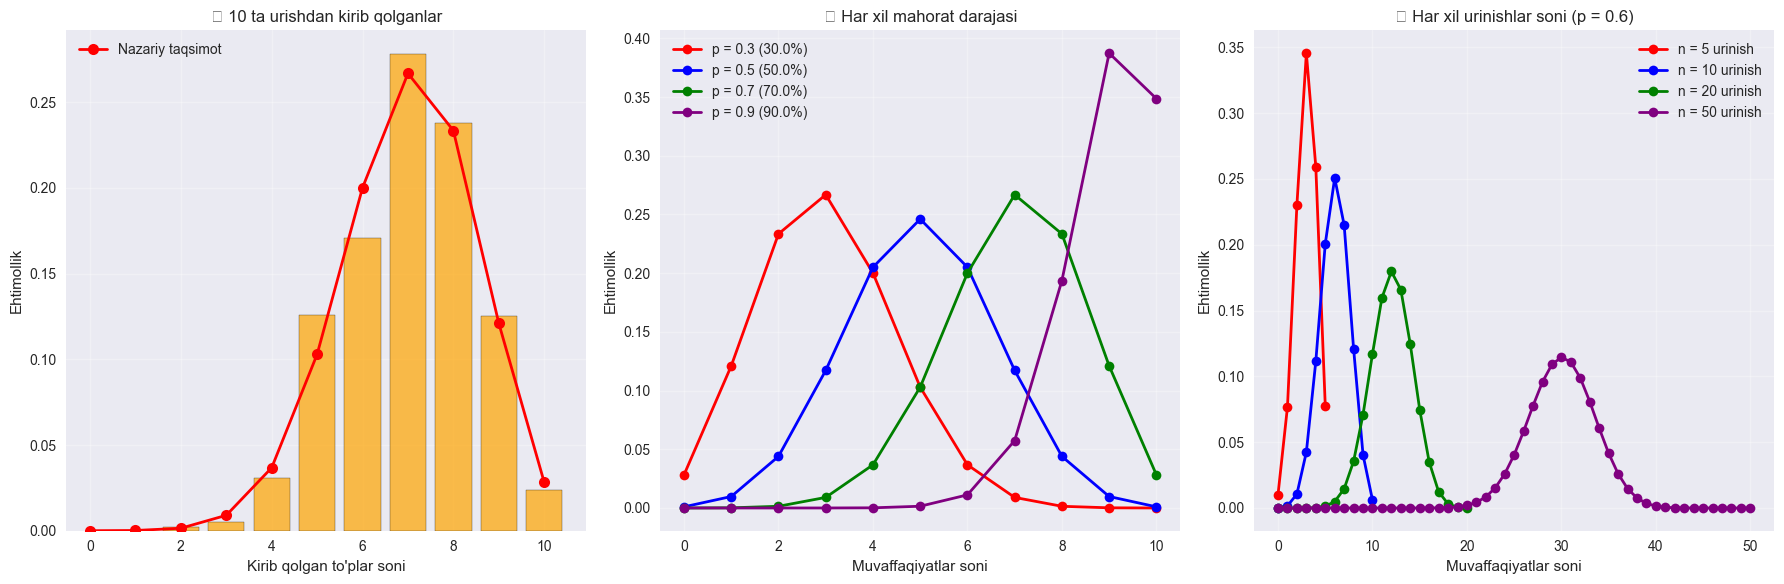

📊 NAZARIY HISOBLASHLAR:
   • Kutilayotgan qiymat: 7.0 ta to'p
   • Dispersiya: 2.10
   • Standart og'ish: 1.45
🎯 MAXSUS EHTIMOLLIKLAR:
   • Aynan 7 ta kirib qolish: 0.267 (26.7%)
   • 8 ta yoki undan ko'p: 0.383 (38.3%)
   • 5 tadan kam: 0.047 (4.7%)
🎮 AMALIY MISOL:
   Agar siz 70% aniqlik bilan erkin urish otasiz,
   10 ta urinishda o'rtacha 7 ta kirib qoladi!
   Lekin ba'zan 6 ta yoki 8 ta ham bo'lishi mumkin.


In [ ]:
# 🏀 BASKETBALL ERKIN URISH SIMULATSIYASI
print("🏀 BASKETBALL ERKIN URISH O'YINI!")
print("=" * 40)

# O'yin parametrlari
n_shots = 10  # 10 ta erkin urish
p_success = 0.7  # 70% muvaffaqiyat ehtimoli
n_games = 1000  # ``1000 ta o'yin

print(f"📊 O'yin shartlari:")
print(f"   • Har o'yinda {n_shots} ta erkin urish")
print(f"   • Har urishning kirib qolish ehtimoli: {p_success*100}%")
print(f"   • Jami o'yinlar: {n_games}")

# Simulatsiya
successful_shots = np.random.binomial(n_shots, p_success, n_games)

print(f"🎯 NATIJALAR:")
print(f"   • O'rtacha kirib qolgan to'plar: {np.mean(successful_shots):.1f}")
print(f"   • Eng ko'p kirib qolgan: {np.max(successful_shots)}")
print(f"   • Eng kam kirib qolgan: {np.min(successful_shots)}")

# Grafik yaratish
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

# 1. HISTOGRAM - simulatsiya natijalari
unique, counts = np.unique(successful_shots, return_counts=True)
ax1.bar(unique, counts/n_games, alpha=0.7, color='orange', edgecolor='black')

# Nazariy binomial taqsimot
x_theoretical = np.arange(0, n_shots+1)
y_theoretical = stats.binom.pmf(x_theoretical, n_shots, p_success)
ax1.plot(x_theoretical, y_theoretical, 'ro-', linewidth=2, markersize=8, 
         label='Nazariy taqsimot')

ax1.set_xlabel("Kirib qolgan to'plar soni")
ax1.set_ylabel('Ehtimollik')
ax1.set_title(f'🎲 {n_shots} ta urishdan kirib qolganlar')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2. HAR XIL EHTIMOLLIKLAR BILAN TAQQOSLASH
probabilities = [0.3, 0.5, 0.7, 0.9]
colors = ['red', 'blue', 'green', 'purple']

for i, p in enumerate(probabilities):
    y = stats.binom.pmf(x_theoretical, n_shots, p)
    ax2.plot(x_theoretical, y, 'o-', color=colors[i], linewidth=2, 
             label=f'p = {p} ({p*100}%)')

ax2.set_xlabel('Muvaffaqiyatlar soni')
ax2.set_ylabel('Ehtimollik')
ax2.set_title('🎯 Har xil mahorat darajasi')
ax2.legend()
ax2.grid(True, alpha=0.3)

# 3. HAR XIL URINISHLAR SONI BILAN TAQQOSLASH
n_trials = [5, 10, 20, 50]
p_fixed = 0.6

for i, n in enumerate(n_trials):
    x = np.arange(0, n+1)
    y = stats.binom.pmf(x, n, p_fixed)
    ax3.plot(x, y, 'o-', color=colors[i], linewidth=2, 
             label=f'n = {n} urinish')

ax3.set_xlabel('Muvaffaqiyatlar soni')
ax3.set_ylabel('Ehtimollik')
ax3.set_title(f'📈 Har xil urinishlar soni (p = {p_fixed})')
ax3.legend()
ax3.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Nazariy hisoblashlar
expected_value = n_shots * p_success
variance = n_shots * p_success * (1 - p_success)
std_dev = np.sqrt(variance)

print(f"📊 NAZARIY HISOBLASHLAR:")
print(f"   • Kutilayotgan qiymat: {expected_value:.1f} ta to'p")
print(f"   • Dispersiya: {variance:.2f}")
print(f"   • Standart og'ish: {std_dev:.2f}")

# Ehtimolliklarni hisoblash
prob_exact_7 = stats.binom.pmf(7, n_shots, p_success)
prob_at_least_8 = 1 - stats.binom.cdf(7, n_shots, p_success)
prob_less_than_5 = stats.binom.cdf(4, n_shots, p_success)

print(f"🎯 MAXSUS EHTIMOLLIKLAR:")
print(f"   • Aynan 7 ta kirib qolish: {prob_exact_7:.3f} ({prob_exact_7*100:.1f}%)")
print(f"   • 8 ta yoki undan ko'p: {prob_at_least_8:.3f} ({prob_at_least_8*100:.1f}%)")
print(f"   • 5 tadan kam: {prob_less_than_5:.3f} ({prob_less_than_5*100:.1f}%)")

print(f"🎮 AMALIY MISOL:")
print(f"   Agar siz 70% aniqlik bilan erkin urish otasiz,")
print(f"   10 ta urinishda o'rtacha {expected_value:.0f} ta kirib qoladi!")
print(f"   Lekin ba'zan {expected_value-std_dev:.0f} ta yoki {expected_value+std_dev:.0f} ta ham bo'lishi mumkin.")

## 📏 Uniform Taqsimot (Tekis taqsimot)

**Oddiy tilda:** Bu "hammasi teng ehtimollik" taqsimoti! Har bir qiymat bir xil ehtimolga ega.

**Misol:**
- 🎲 Zarni tashlash (1 dan 6 gacha har bir raqam teng ehtimolda)
- 🎯 Aylanma g'ildirakda har qanday nuqta teng ehtimolda
- ⏰ Tasodifiy vaqtda kelish (masalan, 10:00 dan 11:00 gacha)
- 🔢 1 dan 100 gacha tasodifiy son tanlash

### 📚 Asosiy tushunchalar:

- **a** = eng kichik qiymat (masalan, zarda 1)
- **b** = eng katta qiymat (masalan, zarda 6)
- Har bir qiymat ehtimoli = 1/(b-a)

### 🎯 Xususiyatlari:
- Har bir interval teng ehtimollik
- To'g'ri to'rtburchak shaklida grafik
- O'rtacha = (a + b) / 2

### 🧮 Formula (oddiy!):
```
f(x) = 1/(b-a)   agar a ≤ x ≤ b
f(x) = 0         boshqa hollarda
```
- Har bir qiymat uchun ehtimollik bir xil
- Parametrlari: $a$ va $b$

🎲 UNIFORM TAQSIMOT - HAMMASI TENG!
🎲 ZAR TASHLASH:
   • 10000 marta tashlash natijasi:
     Raqam 1: 1654 marta (16.5%)
     Raqam 2: 1714 marta (17.1%)
     Raqam 3: 1606 marta (16.1%)
     Raqam 4: 1667 marta (16.7%)
     Raqam 5: 1715 marta (17.2%)
     Raqam 6: 1644 marta (16.4%)
📊 UZLUKSIZ UNIFORM TAQSIMOT (0 dan 10 gacha):
   • O'rtacha: 5.06 (kutilgan: 5.0)
   • Eng kichik: 0.09
   • Eng katta: 10.00


/var/folders/kp/_7qjsy8s0lg8j_3vqs3w_jzm0000gn/T/ipykernel_98157/3770060099.py:78: UserWarning: Glyph 127922 (\N{GAME DIE}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/kp/_7qjsy8s0lg8j_3vqs3w_jzm0000gn/T/ipykernel_98157/3770060099.py:78: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/kp/_7qjsy8s0lg8j_3vqs3w_jzm0000gn/T/ipykernel_98157/3770060099.py:78: UserWarning: Glyph 128295 (\N{WRENCH}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/kp/_7qjsy8s0lg8j_3vqs3w_jzm0000gn/T/ipykernel_98157/3770060099.py:78: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  plt.tight_layout()


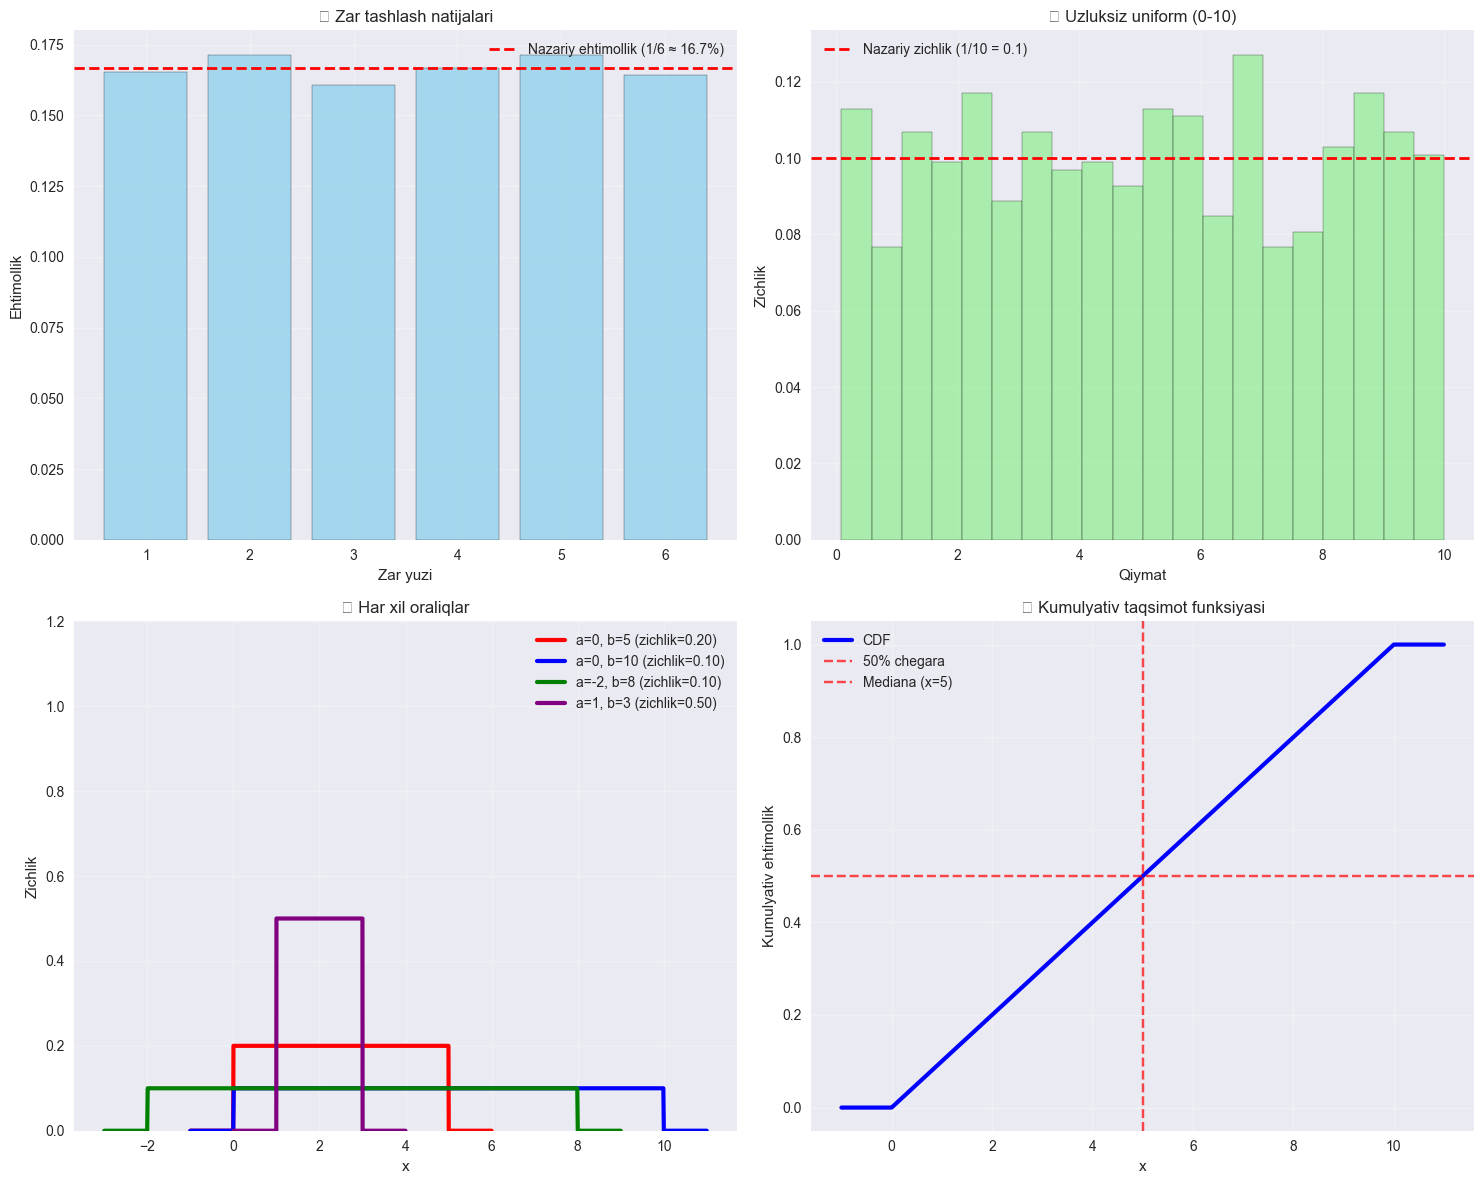

🌍 REAL HAYOTDAN MISOLLAR:
   • 🕐 9:00-10:00 orasida tasodifiy kelish vaqti
   • 🎯 Aylana ustida tasodifiy nuqta
   • 🔢 0-100 orasida tasodifiy raqam
   • 📏 1-10 santimetr orasida tasodifiy uzunlik
🧮 EHTIMOLLIK HISOBLASH (0-10 oraliqda):
   • 7 dan kichik bo'lish: 0.7 yoki 70.0%
   • 3 dan 8 gacha bo'lish: 0.5 yoki 50.0%
   • Aynan 5.5 bo'lish: 0 (uzluksiz taqsimotda)
✨ ASOSIY QOIDA:
   Uniform taqsimotda istalgan intervalning ehtimoli
   = (interval uzunligi) / (umumiy oraliq uzunligi)


In [ ]:
# 🎲 ZARDA TASHLASH VA RAQAMLAR G'ILDIRAGI
print("🎲 UNIFORM TAQSIMOT - HAMMASI TENG!")
print("=" * 40)

# 1. ZAR TASHASH SIMULATSIYASI
print("🎲 ZAR TASHLASH:")
n_throws = 10000
dice_results = np.random.randint(1, 7, n_throws)

# Har raqam necha marta chiqdi?
unique_dice, counts_dice = np.unique(dice_results, return_counts=True)
print(f"   • {n_throws} marta tashlash natijasi:")
for face, count in zip(unique_dice, counts_dice):
    percentage = count/n_throws*100
    print(f"     Raqam {face}: {count} marta ({percentage:.1f}%)")

# 2. UZLUKSIZ UNIFORM TAQSIMOT (masalan, 0 dan 10 gacha)
print(f"📊 UZLUKSIZ UNIFORM TAQSIMOT (0 dan 10 gacha):")
continuous_uniform = np.random.uniform(0, 10, 1000)
print(f"   • O'rtacha: {np.mean(continuous_uniform):.2f} (kutilgan: 5.0)")
print(f"   • Eng kichik: {np.min(continuous_uniform):.2f}")
print(f"   • Eng katta: {np.max(continuous_uniform):.2f}")

# Grafiklar yaratish
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# 1. ZAR TASHLASH HISTOGRAM
ax1.bar(unique_dice, counts_dice/n_throws, alpha=0.7, color='skyblue', edgecolor='black')
ax1.axhline(y=1/6, color='red', linestyle='--', linewidth=2, 
            label='Nazariy ehtimollik (1/6 ≈ 16.7%)')
ax1.set_xlabel('Zar yuzi')
ax1.set_ylabel('Ehtimollik')
ax1.set_title('🎲 Zar tashlash natijalari')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2. UZLUKSIZ UNIFORM - HISTOGRAM
ax2.hist(continuous_uniform, bins=20, density=True, alpha=0.7, 
         color='lightgreen', edgecolor='black')
ax2.axhline(y=0.1, color='red', linestyle='--', linewidth=2, 
            label='Nazariy zichlik (1/10 = 0.1)')
ax2.set_xlabel('Qiymat')
ax2.set_ylabel('Zichlik')
ax2.set_title('📊 Uzluksiz uniform (0-10)')
ax2.legend()
ax2.grid(True, alpha=0.3)

# 3. HAR XIL ORALIQLAR BILAN TAQQOSLASH
ranges = [(0, 5), (0, 10), (-2, 8), (1, 3)]
colors = ['red', 'blue', 'green', 'purple']

for i, (a, b) in enumerate(ranges):
    x = np.linspace(a-1, b+1, 1000)
    y = np.where((x >= a) & (x <= b), 1/(b-a), 0)
    ax3.plot(x, y, color=colors[i], linewidth=3, 
             label=f'a={a}, b={b} (zichlik={1/(b-a):.2f})')

ax3.set_xlabel('x')
ax3.set_ylabel('Zichlik')
ax3.set_title('🔧 Har xil oraliqlar')
ax3.legend()
ax3.grid(True, alpha=0.3)
ax3.set_ylim(0, 1.2)

# 4. KUMULYATIV TAQSIMOT FUNKSIYASI
x = np.linspace(-1, 11, 1000)
# 0 dan 10 gacha uniform uchun CDF
cdf = np.where(x < 0, 0, np.where(x <= 10, x/10, 1))
ax4.plot(x, cdf, 'b-', linewidth=3, label='CDF')
ax4.axhline(y=0.5, color='red', linestyle='--', alpha=0.7, label='50% chegara')
ax4.axvline(x=5, color='red', linestyle='--', alpha=0.7, label='Mediana (x=5)')
ax4.set_xlabel('x')
ax4.set_ylabel('Kumulyativ ehtimollik')
ax4.set_title('📈 Kumulyativ taqsimot funksiyasi')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Real hayotdan misollar
print(f"🌍 REAL HAYOTDAN MISOLLAR:")
print(f"   • 🕐 9:00-10:00 orasida tasodifiy kelish vaqti")
print(f"   • 🎯 Aylana ustida tasodifiy nuqta")
print(f"   • 🔢 0-100 orasida tasodifiy raqam")
print(f"   • 📏 1-10 santimetr orasida tasodifiy uzunlik")

# Ehtimollik hisoblash misoli
a, b = 0, 10
target_value = 7
prob_less_than_7 = (target_value - a) / (b - a)
prob_between_3_8 = (8 - 3) / (b - a)

print(f"🧮 EHTIMOLLIK HISOBLASH (0-10 oraliqda):")
print(f"   • {target_value} dan kichik bo'lish: {prob_less_than_7:.1f} yoki {prob_less_than_7*100}%")
print(f"   • 3 dan 8 gacha bo'lish: {prob_between_3_8:.1f} yoki {prob_between_3_8*100}%")
print(f"   • Aynan 5.5 bo'lish: 0 (uzluksiz taqsimotda)")

print(f"✨ ASOSIY QOIDA:")
print(f"   Uniform taqsimotda istalgan intervalning ehtimoli")
print(f"   = (interval uzunligi) / (umumiy oraliq uzunligi)")

## ⏰ Exponential Taqsimot (Eksponsial taqsimot)

**Oddiy tilda:** Bu "kutish vaqti" taqsimoti! Biror voqeaning sodir bo'lishini qancha kutish kerakligini ko'rsatadi.

**Misol:**
- ⏰ Avtobus kelguncha kutish vaqti
- 📞 Keyingi telefon qo'ng'irog'igacha vaqt
- 🔧 Qurilma buzilguncha ishlash vaqti
- 🍕 Ovqat buyurtmasini olishgacha kutish vaqti
- 💡 Lampochka yonib turish muddati

### 📚 Asosiy tushunchalar:

- **λ (lambda)** = voqea tezligi (masalan, soatiga 3 ta avtobus)
- **1/λ** = o'rtacha kutish vaqti (masalan, 20 daqiqa)
- Ko'p hollarda qisqa vaqt, kamdan-kam uzun vaqt

### 🎯 Xususiyatlari:
- Hamma vaqt 0 dan katta
- Ko'p hollarda kichik qiymatlar (qisqa kutish)
- Uzun "dum" - ba'zan juda uzun kutish
- "Xotira yo'q" - avvalgi kutish keyingiga ta'sir qilmaydi

🚌 AVTOBUS KUTISH VAQTI SIMULATSIYASI
📊 Bekat shartlari:
   • Avtobuslar o'rtacha har 15 daqiqada keladi
   • Lambda (λ) = 0.0667
   • 1000 kishi bekatta kutishdi

⏱️ KUTISH VAQTI STATISTIKASI:
   • O'rtacha kutish: 15.1 daqiqa
   • Mediana: 10.0 daqiqa
   • Eng qisqa kutish: 0.1 daqiqa
   • Eng uzoq kutish: 95.2 daqiqa

📊 KUTISH STATISTIKASI:
   • 5 daq dan kam kutuvchilar: 28.3%
   • 10 daq dan kam kutuvchilar: 48.7%
   • 15 daq dan kam kutuvchilar: 63.2%
   • 20 daq dan kam kutuvchilar: 73.6%
   • 30 daq dan kam kutuvchilar: 86.5%
   • 45 daq dan kam kutuvchilar: 95.0%
   • 60 daq dan kam kutuvchilar: 98.2%


/var/folders/kp/_7qjsy8s0lg8j_3vqs3w_jzm0000gn/T/ipykernel_98157/193664798.py:104: UserWarning: Glyph 9200 (\N{ALARM CLOCK}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/kp/_7qjsy8s0lg8j_3vqs3w_jzm0000gn/T/ipykernel_98157/193664798.py:104: UserWarning: Glyph 128652 (\N{BUS}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/kp/_7qjsy8s0lg8j_3vqs3w_jzm0000gn/T/ipykernel_98157/193664798.py:104: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/kp/_7qjsy8s0lg8j_3vqs3w_jzm0000gn/T/ipykernel_98157/193664798.py:104: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) Arial.
  plt.tight_layout()
/Users/bnutfilloyev/Developer/lesson/venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9200 (\N{ALARM CLOCK}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/bnutfilloyev/Developer/lesson/venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:1

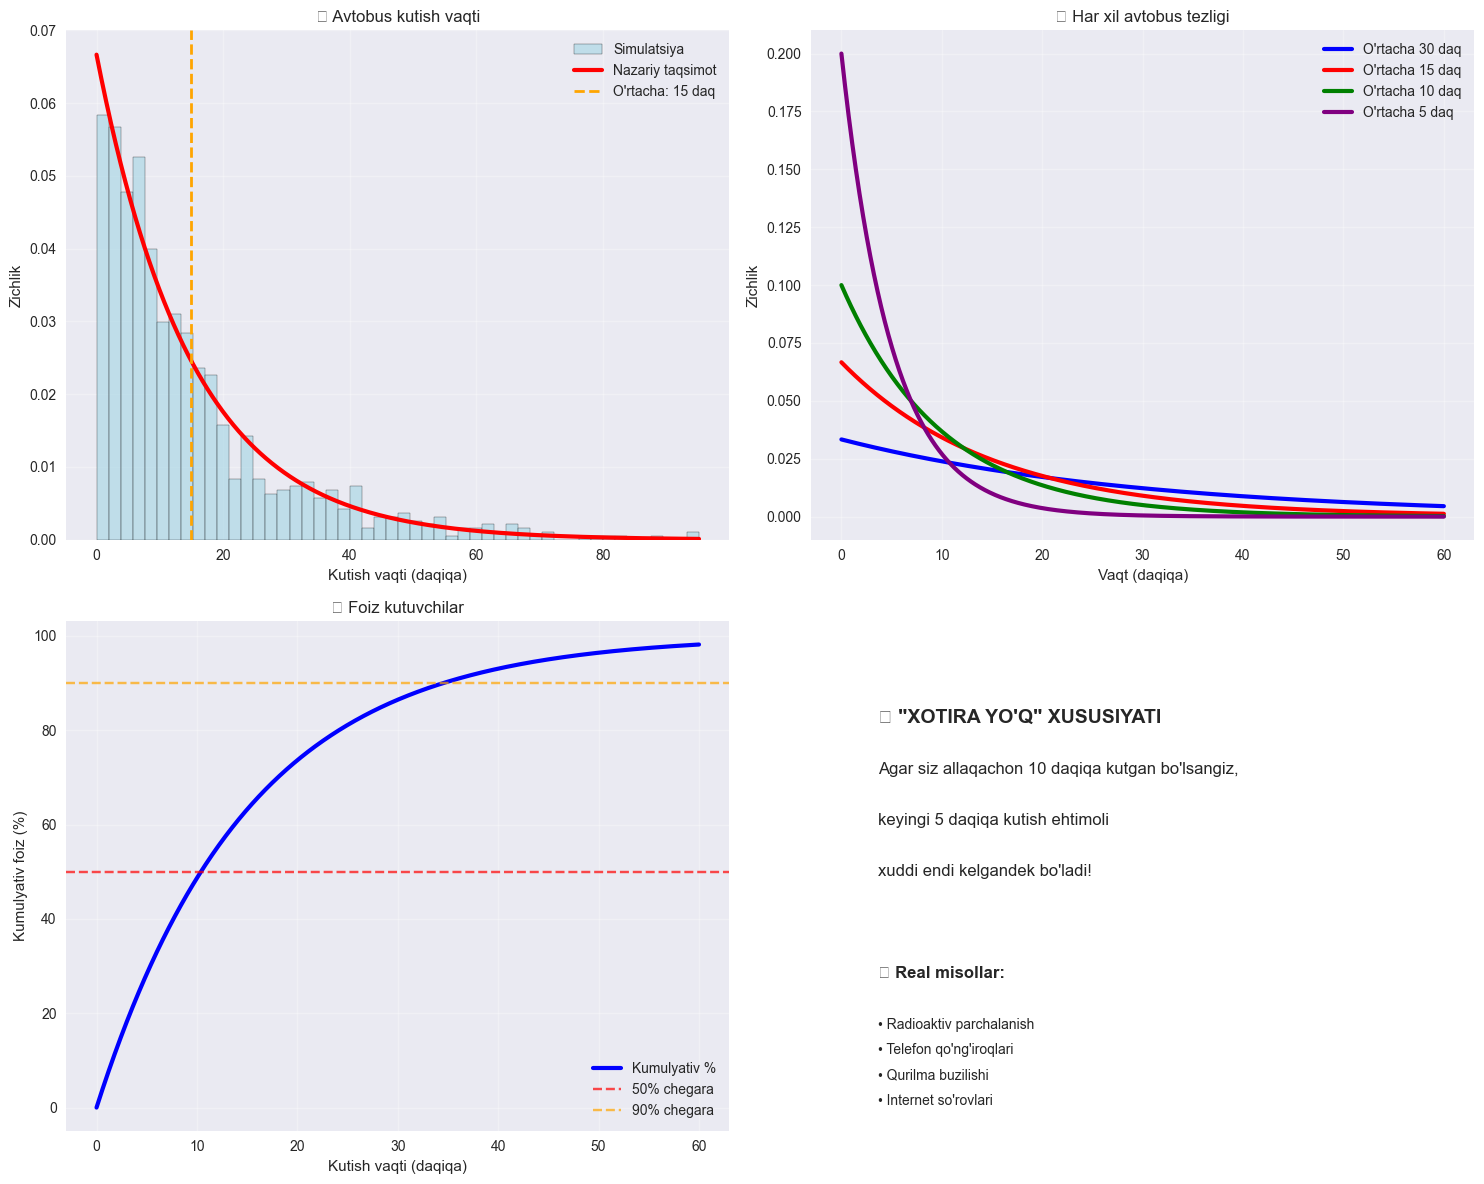


🧮 AMALIY HISOBLASHLAR:
   • 5 daqiqada avtobus kelish ehtimoli: 0.283 (28.3%)
   • 10 daqiqada avtobus kelish ehtimoli: 0.487 (48.7%)
   • 30 daqiqada avtobus kelish ehtimoli: 0.865 (86.5%)
   • 50% odamlar 10.4 daqiqadan kam kutishadi

🎯 ASOSIY QOIDA:
   Exponential taqsimotda ko'p odamlar qisqa kutishadi,
   lekin ba'zi baxtsizlar juda uzoq kutishlari mumkin!
   • 90% odamlar 34.5 daqiqadan kam kutishadi
   • 10% odamlar 34.5 daqiqadan ko'p kutishadi


In [23]:
# ⏰ AVTOBUS BEKATI - KUTISH VAQTI SIMULATSIYASI
print("🚌 AVTOBUS KUTISH VAQTI SIMULATSIYASI")
print("=" * 40)

# Avtobus parametrlari
lam = 1/15  # O'rtacha 15 daqiqada bir marta keladi (λ = 1/15)
mean_wait = 1/lam  # O'rtacha kutish vaqti
n_people = 1000  # 1000 kishi kutadi

print(f"📊 Bekat shartlari:")
print(f"   • Avtobuslar o'rtacha har {mean_wait:.0f} daqiqada keladi")
print(f"   • Lambda (λ) = {lam:.4f}")
print(f"   • {n_people} kishi bekatta kutishdi")

# Kutish vaqtlarini simulatsiya qilish
wait_times = np.random.exponential(mean_wait, n_people)

print(f"\n⏱️ KUTISH VAQTI STATISTIKASI:")
print(f"   • O'rtacha kutish: {np.mean(wait_times):.1f} daqiqa")
print(f"   • Mediana: {np.median(wait_times):.1f} daqiqa")
print(f"   • Eng qisqa kutish: {np.min(wait_times):.1f} daqiqa")
print(f"   • Eng uzoq kutish: {np.max(wait_times):.1f} daqiqa")

# Grafiklar yaratish
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# 1. HISTOGRAM - kutish vaqtlari
ax1.hist(wait_times, bins=50, density=True, alpha=0.7, 
         color='lightblue', edgecolor='black', label='Simulatsiya')

# Nazariy exponential taqsimot
x_theory = np.linspace(0, np.max(wait_times), 1000)
y_theory = lam * np.exp(-lam * x_theory)
ax1.plot(x_theory, y_theory, 'r-', linewidth=3, label='Nazariy taqsimot')

ax1.axvline(mean_wait, color='orange', linestyle='--', linewidth=2,
            label=f'O\'rtacha: {mean_wait:.0f} daq')
ax1.set_xlabel('Kutish vaqti (daqiqa)')
ax1.set_ylabel('Zichlik')
ax1.set_title('⏰ Avtobus kutish vaqti')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2. HAR XIL LAMBDA QIYATLARI BILAN TAQQOSLASH
lambdas = [1/30, 1/15, 1/10, 1/5]  # 30, 15, 10, 5 daqiqa o'rtacha
colors = ['blue', 'red', 'green', 'purple']
labels = ['30 daq', '15 daq', '10 daq', '5 daq']

x = np.linspace(0, 60, 1000)
for i, l in enumerate(lambdas):
    y = l * np.exp(-l * x)
    ax2.plot(x, y, color=colors[i], linewidth=3, 
             label=f'O\'rtacha {labels[i]}')

ax2.set_xlabel('Vaqt (daqiqa)')
ax2.set_ylabel('Zichlik')
ax2.set_title('🚌 Har xil avtobus tezligi')
ax2.legend()
ax2.grid(True, alpha=0.3)

# 3. KUMULYATIV TAQSIMOT - qancha foiz X daqiqadan kam kutadi?
wait_percentiles = [5, 10, 15, 20, 30, 45, 60]
print(f"\n📊 KUTISH STATISTIKASI:")
for time in wait_percentiles:
    prob = 1 - np.exp(-lam * time)
    print(f"   • {time} daq dan kam kutuvchilar: {prob*100:.1f}%")

# CDF grafigi
y_cdf = 1 - np.exp(-lam * x)
ax3.plot(x, y_cdf * 100, 'b-', linewidth=3, label='Kumulyativ %')
ax3.axhline(y=50, color='red', linestyle='--', alpha=0.7, label='50% chegara')
ax3.axhline(y=90, color='orange', linestyle='--', alpha=0.7, label='90% chegara')
ax3.set_xlabel('Kutish vaqti (daqiqa)')
ax3.set_ylabel('Kumulyativ foiz (%)')
ax3.set_title('📊 Foiz kutuvchilar')
ax3.legend()
ax3.grid(True, alpha=0.3)

# 4. "XOTIRA YO'Q" XUSUSIYATI - mashhur misal
ax4.text(0.1, 0.8, '🧠 "XOTIRA YO\'Q" XUSUSIYATI', 
         fontsize=14, fontweight='bold', transform=ax4.transAxes)
ax4.text(0.1, 0.7, 'Agar siz allaqachon 10 daqiqa kutgan bo\'lsangiz,', 
         fontsize=12, transform=ax4.transAxes)
ax4.text(0.1, 0.6, 'keyingi 5 daqiqa kutish ehtimoli', 
         fontsize=12, transform=ax4.transAxes)
ax4.text(0.1, 0.5, 'xuddi endi kelgandek bo\'ladi!', 
         fontsize=12, transform=ax4.transAxes)

ax4.text(0.1, 0.3, '⏰ Real misollar:', 
         fontsize=12, fontweight='bold', transform=ax4.transAxes)
ax4.text(0.1, 0.2, '• Radioaktiv parchalanish', 
         fontsize=10, transform=ax4.transAxes)
ax4.text(0.1, 0.15, '• Telefon qo\'ng\'iroqlari', 
         fontsize=10, transform=ax4.transAxes)
ax4.text(0.1, 0.1, '• Qurilma buzilishi', 
         fontsize=10, transform=ax4.transAxes)
ax4.text(0.1, 0.05, '• Internet so\'rovlari', 
         fontsize=10, transform=ax4.transAxes)

ax4.set_xlim(0, 1)
ax4.set_ylim(0, 1)
ax4.axis('off')

plt.tight_layout()
plt.show()

# Amaliy hisoblashlar
print(f"\n🧮 AMALIY HISOBLASHLAR:")

# P(X ≤ t) = 1 - e^(-λt)
prob_5min = 1 - np.exp(-lam * 5)
prob_10min = 1 - np.exp(-lam * 10)
prob_30min = 1 - np.exp(-lam * 30)

print(f"   • 5 daqiqada avtobus kelish ehtimoli: {prob_5min:.3f} ({prob_5min*100:.1f}%)")
print(f"   • 10 daqiqada avtobus kelish ehtimoli: {prob_10min:.3f} ({prob_10min*100:.1f}%)")
print(f"   • 30 daqiqada avtobus kelish ehtimoli: {prob_30min:.3f} ({prob_30min*100:.1f}%)")

# Mediana (50% ehtimollik)
median_wait = np.log(2) / lam
print(f"   • 50% odamlar {median_wait:.1f} daqiqadan kam kutishadi")

print(f"\n🎯 ASOSIY QOIDA:")
print(f"   Exponential taqsimotda ko'p odamlar qisqa kutishadi,")
print(f"   lekin ba'zi baxtsizlar juda uzoq kutishlari mumkin!")

# 90-percentil
percentile_90 = -np.log(0.1) / lam
print(f"   • 90% odamlar {percentile_90:.1f} daqiqadan kam kutishadi")
print(f"   • 10% odamlar {percentile_90:.1f} daqiqadan ko'p kutishadi")

## 6. Taqsimotlarni taqqoslash

Quyidagi grafikda barcha o'rganilgan taqsimotlar birga ko'rsatiladi. Parametrlar ta'siri va taqsimotlarning xususiyatlari taqqoslanadi.

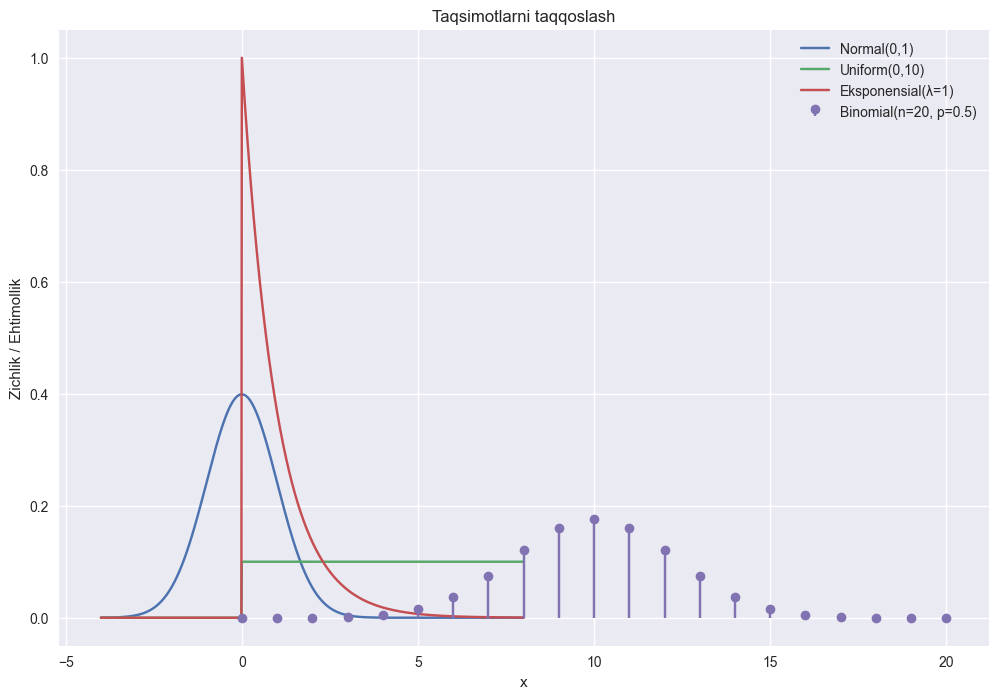

In [24]:
# Taqsimotlarni bir grafikda taqqoslash
x = np.linspace(-4, 8, 1000)
plt.plot(x, stats.norm.pdf(x, 0, 1), label='Normal(0,1)')
plt.plot(x, stats.uniform.pdf(x, 0, 10), label='Uniform(0,10)')
plt.plot(x, stats.expon.pdf(x, scale=1), label='Eksponensial(λ=1)')

# Binomial uchun diskret nuqtalar
k = np.arange(0, 21)
pk = stats.binom.pmf(k, 20, 0.5)
plt.stem(k, pk, linefmt='C3-', markerfmt='C3o', basefmt=" ", label='Binomial(n=20, p=0.5)')

plt.title('Taqsimotlarni taqqoslash')
plt.xlabel('x')
plt.ylabel('Zichlik / Ehtimollik')
plt.legend()
plt.show()

## 7. Amaliy mashqlar - 1-guruh

Quyidagi mashqlarni bajaring:

1. $\mu=5$, $\sigma=2$ bo'lgan normal taqsimotdan 1000 ta tasodifiy son generatsiya qiling va histogrammasini chizing.
2. $n=10$, $p=0.7$ bo'lgan binomial taqsimot uchun ehtimollik massasi funksiyasini (PMF) chizing.
3. $a=2$, $b=8$ bo'lgan uniform taqsimotdan 500 ta son generatsiya qiling va histogrammasini chizing.
4. $\lambda=0.5$ bo'lgan eksponensial taqsimotdan 1000 ta son generatsiya qiling va histogrammasini chizing.

## 8. Amaliy mashqlar - 2-guruh

Quyidagi mashqlarni bajaring:

1. $\mu=10$, $\sigma=3$ bo'lgan normal taqsimotdan 2000 ta son generatsiya qiling va natijani tahlil qiling.
2. $n=15$, $p=0.3$ bo'lgan binomial taqsimot uchun ehtimollik massasi funksiyasini chizing va o'rtacha qiymatini hisoblang.
3. $a=-5$, $b=5$ bo'lgan uniform taqsimotdan 1000 ta son generatsiya qiling va histogrammasini chizing.
4. $\lambda=2$ bo'lgan eksponensial taqsimotdan 500 ta son generatsiya qiling va natijani tahlil qiling.

## 9. Uyga vazifa

Quyidagi topshiriqlarni mustaqil bajaring:

1. $\mu=0$, $\sigma=5$ bo'lgan normal taqsimotdan 3000 ta son generatsiya qiling, histogramma va zichlik grafigini chizing.
2. $n=25$, $p=0.4$ bo'lgan binomial taqsimot uchun ehtimollik massasi funksiyasini chizing va natijani tahlil qiling.
3. $a=1$, $b=7$ bo'lgan uniform taqsimotdan 1500 ta son generatsiya qiling va natijani tahlil qiling.
4. $\lambda=1.5$ bo'lgan eksponensial taqsimotdan 2000 ta son generatsiya qiling va histogrammasini chizing.
5. Har bir taqsimot uchun grafiklarni taqqoslang va qisqacha tahlil yozing.